### Now , I will use clean bank data to make model.

In [3]:
#pip install lightgbm

In [1]:
import xgboost as xgb

In [2]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 23)

In [ ]:
pd.set_option('display.max_rows', 999)

In [4]:
bank_model=pd.read_csv('clean_data.csv')

In [5]:
bank_model.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,y
0,9.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
1,5.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
2,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
3,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
4,9.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no


In [6]:
bank_model.columns

Index(['age', 'education', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'education_unknown', 'month', 'day_of_week',
       'contact_telephone', 'campaign_2', 'campaign_3', 'campaign_4',
       'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8', 'campaign_9',
       'campaign_10', 'campaign_11', 'campaign_12', 'campaign_13',
       'campaign_14', 'campaign_15', 'campaign_16', 'campaign_17',
       'campaign_18', 'campaign_19', 'campaign_20', 'campaign_21',
       'campaign_22', 'campaign_23', 'campaign_24', 'campaign_25',
       'campaign_26', 'campaign_27', 'campaign_28', 'campaign_29',
       'campaign_30', 'campaign_31', 'campaign_32', 'campaign_33',
       'campaign_34', 'campaign_35', 'campaign_37', 'campaign_39',
       'campa

In [7]:
bank_model['y'].replace(['no', 'yes'], [0,1], inplace=True)

In [ ]:
#y = pd.get_dummies(bank_model['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [8]:
bank_model[0:].transpose()

,0,1,2,3,4,5,6,7,8,9,10,...,30582,30583,30584,30585,30586,30587,30588,30589,30590,30591,30592
age,9.0,5.0,5.0,9.0,9.0,2.0,2.0,2.0,3.0,9.0,4.0,...,9.0,10.0,10.0,5.0,5.0,3.0,12.0,7.0,9.0,6.0,12.0
education,1.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0,...,5.0,6.0,5.0,6.0,6.0,1.0,5.0,5.0,6.0,5.0,5.0
job_blue-collar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
job_entrepreneur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_housemaid,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
campaign_41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign_42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign_43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign_56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
feat=bank_model.drop(columns=['y'],axis=1)
label=bank_model['y']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 103)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [11]:

# split, random_state is used for repeatable results, you should remove it if you are running your own code.
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size=0.30, random_state=42)


print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (21415, 63)
y train size:  (21415,)
X test size:  (9178, 63)
y test size:  (9178,)


In [12]:
from sklearn.svm import SVC

In [13]:
from sklearn.metrics import precision_score

In [244]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(precision_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7079  939]
 [ 999  161]]
15.0


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,classification_report
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
print(confusion_matrix(y_test, xgbprd ))
print(round(precision_score(y_test, xgbprd),2)*100)
pd.crosstab(y_test,xgbprd)
print(classification_report(y_test,xgbprd))

[[7941   77]
 [1065   95]]
55.00000000000001
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      8018
           1       0.55      0.08      0.14      1160

    accuracy                           0.88      9178
   macro avg       0.72      0.54      0.54      9178
weighted avg       0.84      0.88      0.83      9178



In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()

In [70]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
logpred = logmodel.predict(X_test)

In [72]:

print(confusion_matrix(y_test, logpred))
print(round(precision_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[8018    0]
 [1160    0]]
0.0


In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(precision_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7160  858]
 [ 848  312]]
27.0


In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(precision_score(y_test, gbkpred),2)*100)
pd.crosstab(y_test,gbkpred)
print(classification_report(y_test,gbkpred))

[[7926   92]
 [1047  113]]
55.00000000000001
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      8018
           1       0.55      0.10      0.17      1160

    accuracy                           0.88      9178
   macro avg       0.72      0.54      0.55      9178
weighted avg       0.84      0.88      0.84      9178



In [75]:
print('GradientBoost Reports\n',classification_report(y_test, gbkpred))

GradientBoost Reports
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      8018
           1       0.55      0.10      0.17      1160

    accuracy                           0.88      9178
   macro avg       0.72      0.54      0.55      9178
weighted avg       0.84      0.88      0.84      9178



In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(precision_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7785  233]
 [1007  153]]
40.0


In [77]:
print('Random forest Reports\n',classification_report(y_test, rfcpred))

Random forest Reports
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      8018
           1       0.40      0.13      0.20      1160

    accuracy                           0.86      9178
   macro avg       0.64      0.55      0.56      9178
weighted avg       0.82      0.86      0.83      9178



In [78]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(precision_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[ 140 7878]
 [   1 1159]]
13.0


In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(precision_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7972   46]
 [1120   40]]
47.0


#### We observe that XGBoost and  Gradient Boosting performance are best so now we will tune hyperparameter for XGBoost and Gradient Boosting

#### Training and tuning of XGBoost model
 #### Parameter dictionary

In [324]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### I tried to change some hyper parameters and this increased precision from 0.55 to 0.8

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,classification_report
xgb = XGBClassifier(max_depth=3,colsample_bylevel=0.3,
              colsample_bynode=0.3,min_child_weight=1,learning_rate=0.05,n_estimators=100,reg_alpha=0,reg_lambda=0.5,
                   random_state=1)
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
xgbprd_train=xgb.predict(X_train)
print('Train Precision',precision_score(y_train, xgbprd_train ))
print('Test Precision',precision_score(y_test, xgbprd ))

Train Precision 0.7777777777777778
Test Precision 0.8


#### Now,  I will tune Gradient boosting .

In [82]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [226]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(max_depth=3,n_estimators=100,min_weight_fraction_leaf=0.0,subsample=1,max_features=None,
                                 max_leaf_nodes=None,min_samples_leaf=10, min_samples_split=10)
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
gbkpred_train=gbk.predict(X_train)
print('Train Precision',precision_score(y_train, gbkpred_train ))
print('Test Precision',precision_score(y_test, gbkpred ))

Train Precision 0.5750577367205543
Test Precision 0.5606060606060606


#### Tuning the hyperparameter for Gradient Boosting

In [91]:
from sklearn.model_selection import GridSearchCV

In [213]:
from sklearn.model_selection import GridSearchCV

In [214]:
from sklearn.model_selection import cross_val_score

In [227]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='precision',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.005, 'n_estimators': 750}, 0.5742857142857143)

In [216]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='precision',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'max_depth': 7}, 0.5236757314732692)

Precisuon of the GBM on test set: 0.874
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      8018
           1       0.50      0.13      0.21      1160

    accuracy                           0.87      9178
   macro avg       0.69      0.56      0.57      9178
weighted avg       0.84      0.87      0.84      9178



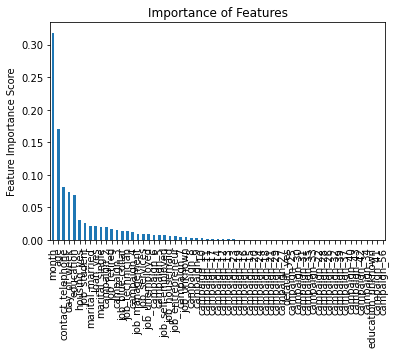

In [223]:
model1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Precisuon of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

In [219]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='precision',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'min_samples_leaf': 9, 'min_samples_split': 60}, 0.5170698557935475)

In [222]:
#TUNING MAX FEATURES
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7, subsample=1, random_state=10), 
param_grid = p_test5, scoring='precision',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'max_features': 7}, 0.49914363185175964)

In [220]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , random_state=10), 
param_grid = p_test6, scoring='precision',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'subsample': 0.9}, 0.5254148815402968)

Precision of the GBM on test set: 0.873
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      8018
           1       0.49      0.12      0.19      1160

    accuracy                           0.87      9178
   macro avg       0.69      0.55      0.56      9178
weighted avg       0.83      0.87      0.84      9178



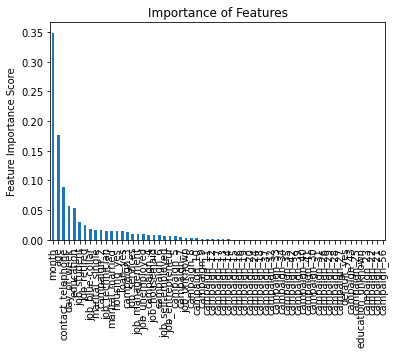

In [224]:
new=GradientBoostingClassifier(learning_rate=0.05, n_estimators=750,max_depth=7, min_samples_split=60, min_samples_leaf=9,max_features=7 , subsample=0.90, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Precision of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

#### The third best model was knn so now I will try to tune hyperparameter of knn .

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,leaf_size= 30,p=1,algorithm='auto',n_jobs=-1)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
knnpred_train=gbk.predict(X_train)
print('Train Precision',precision_score(y_train, gbkpred_train ))
print('Test Precision',precision_score(y_test, gbkpred ))

Train Precision 0.5750577367205543
Test Precision 0.5606060606060606


In [228]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Now I will tune hyperparameter for SVM

In [250]:
kernel=['linear','rbf','poly','sigmoid']
for i in kernal:
    svc=SVC(kernel=i,C=1.0)
    svc.fit(X_train,y_train)
    svcpred = svc.predict(X_test)
    print('for kernel:',i)
   # print('Accuracy:',svc_score(X_train,y_train))
    print(round(precision_score(y_test, svcpred),2)*100)                      

for kernel: linear
0.0
for kernel: rbf
0.0
for kernel: poly
0.0
for kernel: sigmoid
15.0


In [ ]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(precision_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

In [252]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [253]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.1,1,100,1000],'kernel':['linear','poly','sigmoid','rbf'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

In [ ]:
print(grid,best_param_)